<a href="https://colab.research.google.com/github/fbtttt/488/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Nov  1 13:54:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as ply


2.8.0+cu126


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [9]:
from torchvision import datasets

train_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)
test_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)
print(len(train_data))
print(len(test_data))

60000
10000


## 6. Visualize at least 5 different samples of the MNIST training dataset.

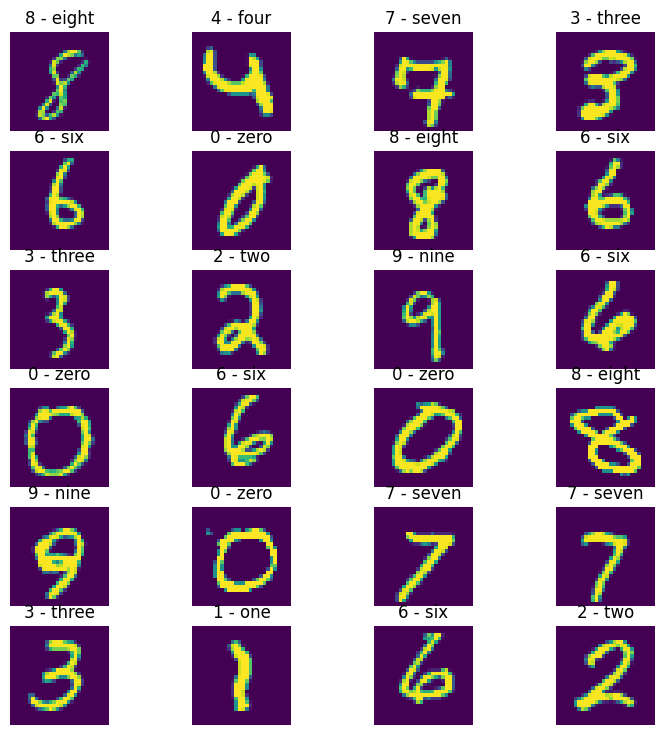

In [20]:
import matplotlib.pyplot as plt
class_names = train_data.classes
fig = plt.figure(figsize=(9,9))
torch.manual_seed(89)
rows, cols = 6, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze())
  plt.title(class_names[label])
  plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [21]:
from torch.utils.data import DataLoader
batch_size = 32

train_dataloader = DataLoader(dataset = train_data,
                batch_size = batch_size,
                shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                batch_size = batch_size,
                shuffle = False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [33]:
from torch import nn
class NUMBERMNISTMODEL(nn.Module):
 def __init__(self,
        input_shape: int,
        hidden_units: int,
        output_shapes: int):
   super().__init__()
   self.conv_block_1 = nn.Sequential(
       nn.Conv2d(in_channels = input_shape,
            out_channels = hidden_units,
            kernel_size = 4,
            stride = 1,
            padding = 1),
       nn.ReLU(),
       nn.Conv2d(in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 4,
            stride = 1,
            padding = 1),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size = 2)
   )
   self.conv_block_2 = nn.Sequential(
       nn.Conv2d(in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 4,
            stride = 1,
            padding = 1),
       nn.ReLU(),
       nn.Conv2d(in_channels = hidden_units,
            out_channels = output_shapes,
            kernel_size = 4,
            stride = 1,
            padding =1),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size = 2)
   )
   self.classifier = nn.Sequential(
       nn.Flatten(),
       nn.Linear(in_features = hidden_units*7*7,
            out_features=output_shapes)
   )
 def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x
model_2=NUMBERMNISTMODEL(
    input_shape = 1,
    hidden_units = 10,
    output_shapes = len(class_names)
).to(device)
model_2

NUMBERMNISTMODEL(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [34]:
import requests
from pathlib import Path

#download helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_functions.py already exists, skipping download


In [36]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
               lr = 0.1)

In [40]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()
device = "cpu"

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n----")
  train_loss = 0
  model_2 = model_2.to(device)
  X = X.to(device)
  y = y.to(device)
  for batch, (X, y) in enumerate(train_dataloader):
    model_2.train()
    y_pred = model_2(X)
    loss = loss_fn(y_pred, y)
    train_loss = train_loss + loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0,0
  model_2.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_2(X_test)
      test_loss = test_loss + loss_fn(test_pred, y_test)
      test_acc = test_acc + accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")


  train_time_end_on_cpu = timer()
  total_time_on_cpu = train_time_end_on_cpu - train_time_start_on_cpu

  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 0
----


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x250 and 490x10)

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?